# School Matcher Graph Demo

This notebook demonstrates using the SchoolMatch AI project with LangGraph.

## 1. Setup and Imports

In [1]:
# Import necessary libraries
import os
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

from langchain_app.school_matcher_graph import (
    create_school_matcher_graph, run_school_matcher, create_graph_config
)
from db.college_vector_store import CollegeVectorStore

## 2. Initialize Components

In [2]:
# Enable LangSmith tracing 
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "schoolmatch-ai" 

In [3]:
# Initialize the vector store
vector_store = CollegeVectorStore()

# Create the graph
graph = create_school_matcher_graph(vector_store)

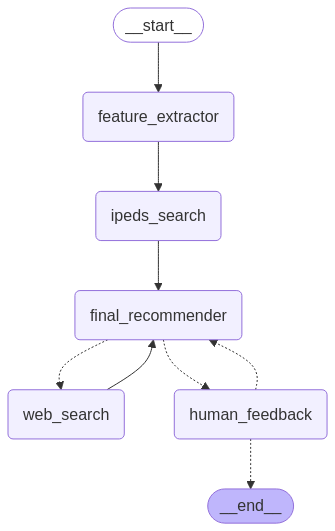

In [4]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

## 3. Run School Matcher

In [5]:
# Run the graph with a sample university
school_name = "Seattle University"

config = create_graph_config()
result = run_school_matcher(graph, school_name, config)



=============== FINAL RECOMMENDER RESPONSE ===============
Response type: <class 'langchain_core.messages.ai.AIMessage'>
Response attributes: ['__abstractmethods__', '__add__', '__annotations__', '__class__', '__class_getitem__', '__class_vars__', '__copy__', '__deepcopy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__fields__', '__fields_set__', '__format__', '__ge__', '__get_pydantic_core_schema__', '__get_pydantic_json_schema__', '__getattr__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__pretty__', '__private_attributes__', '__pydantic_complete__', '__pydantic_computed_fields__', '__pydantic_core_schema__', '__pydantic_custom_init__', '__pydantic_decorators__', '__pydantic_extra__', '__pydantic_fields__', '__pydantic_fields_set__', '__pydantic_generic_metadata__', '__pydantic_init_subclass__', '__pydantic_parent_namespace__', '__pydantic_post_init_